# Q-17 WAP to implement Naïve Bayes through library.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\rcc\Desktop\\onlinefoods.csv")

In [3]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Target                      388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Target                        0
dtype: int64

In [6]:
data.duplicated().sum()

103

In [7]:
data.drop_duplicates()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Target
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
363,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
369,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
374,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes


In [8]:
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [9]:
data["Monthly Income"] = data["Monthly Income"].map({"No Income":0,"Below Rs.10000":1,"More than 50000":2,"10001 to 25000":3,"25001 to 50000":4})

In [10]:
data.Target=data.Target.map({'Yes':1, 'No':0})

In [11]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
data["Gender"] = data["Gender"].map({"Female":0,"Male":1})

In [13]:
data["Marital Status"].unique() 

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [14]:
data["Marital Status"] = data["Marital Status"].map({"Single":0,"Married":1,"Prefer not to say":2})

In [15]:
data["Occupation"].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [16]:
data["Occupation"] = data["Occupation"].map({"Student":0,"Employee":1,"Self Employeed":2,"House wife":3})

In [17]:
data["Educational Qualifications"].unique()

array(['Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School'],
      dtype=object)

In [18]:
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Post Graduate":1,"Graduate":0,"Ph.D":2,"Uneducated":3,"School":4})

In [19]:
data["Output"].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
data["Output"] = data["Output"].map({"Yes":1,"No":0})

In [21]:
data["Feedback"].unique()

array(['Positive', 'Negative '], dtype=object)

In [22]:
data["Feedback"] = data["Feedback"].map({"Positive":1,"Negative ":0})

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    int64  
 11  Feedback                    388 non-null    int64  
 12  Target                      388 non-null    int64  
dtypes: float64(2), int64(11)
memory usa

In [24]:
y = data["Occupation"]

In [25]:
x = data.drop(["Occupation"],axis = 1)

In [26]:
from sklearn.feature_selection import mutual_info_classif

In [27]:
M = mutual_info_classif(x,y)

<Axes: >

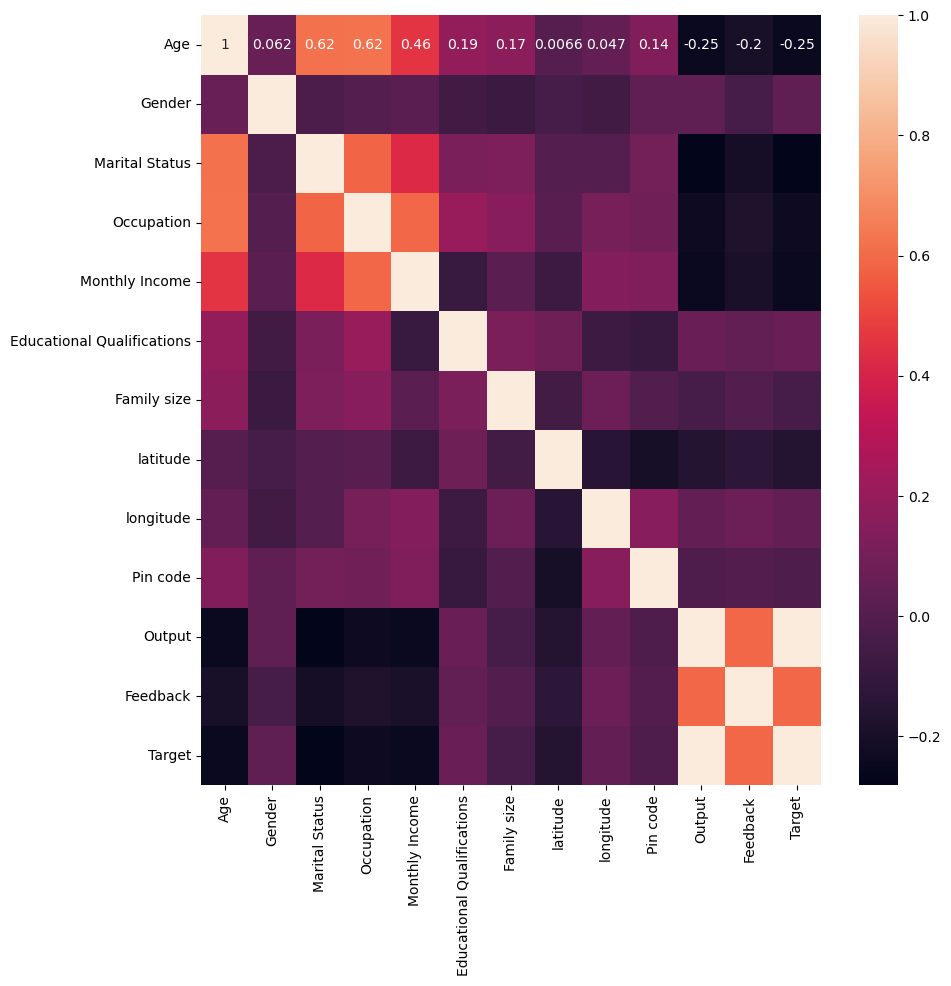

In [28]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(),annot = True)

<BarContainer object of 12 artists>

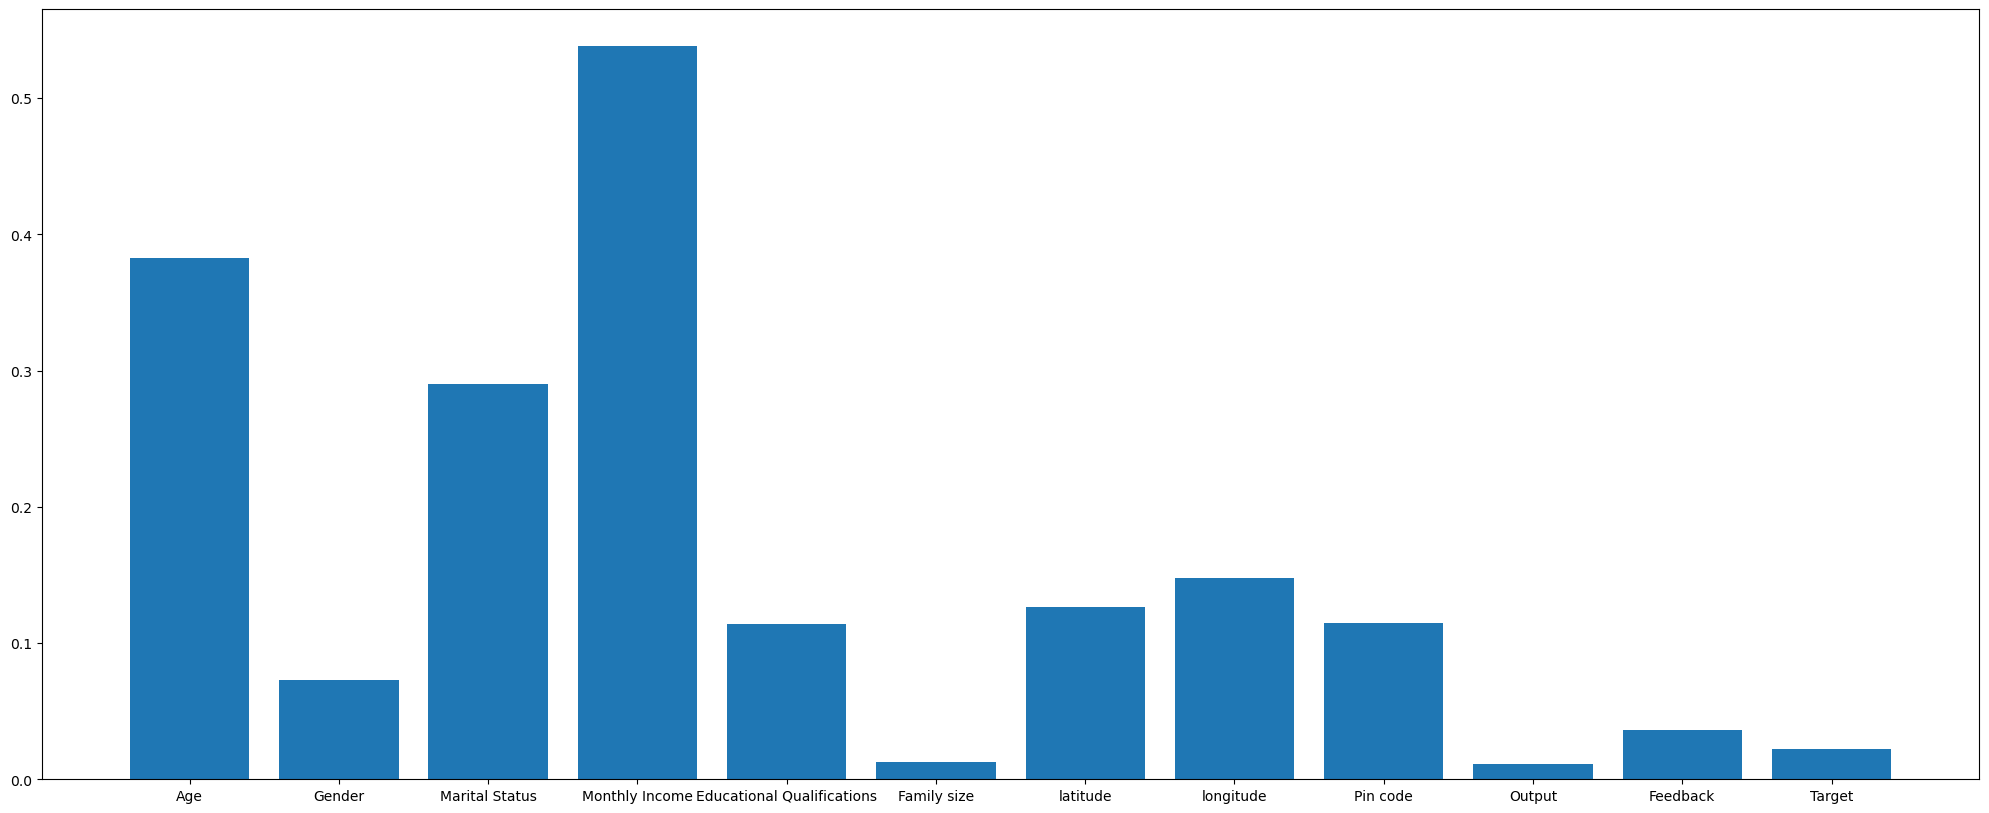

In [29]:
plt.figure(figsize= (25,10))
plt.bar(x.columns,M)

In [30]:
x = x.drop(["Pin code"],axis = 1)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.2,random_state=42)

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [34]:
nb_clf = GaussianNB()
nb_clf.fit(xtrain, ytrain)
y_pred = nb_clf.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8205128205128205


In [35]:
print("Classification Report:")
print(classification_report(ytest, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.76      0.68      0.72        19
           2       0.38      0.33      0.35         9
           3       0.67      0.67      0.67         3

    accuracy                           0.82        78
   macro avg       0.68      0.67      0.67        78
weighted avg       0.81      0.82      0.81        78

